# Preparations

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import sys
import math
import numpy as np
import collections

%matplotlib inline
import matplotlib.pyplot as plt

sys.path.append('../')
from higgs_inference import settings
from higgs_inference.various.utils import s_from_r


In [2]:
colors     = ['#CC002E',  'orange']


In [4]:
margin_l_absolute = 8. * 0.1
margin_r_absolute = 8. * 0.02
margin_sep_absolute = 8. * 0.02
margin_t_absolute = 8. * 0.02
margin_b_absolute = 8. * 0.08

def calculate_height(n_panels=2, width=8.):
    
    if isinstance(n_panels, collections.Sequence):
        n_panels_h, n_panels_v = n_panels
    else:
        n_panels_h = n_panels
        n_panels_v = 1
    
    # Calculate horizontal margins. Units: relative to width.
    margin_l = margin_l_absolute / width
    margin_r = margin_r_absolute / width
    margin_l_subsequent = margin_l
    if n_panels_h > 2:
        margin_l_subsequent = margin_r
    margin_sep = margin_sep_absolute / width
    if n_panels_h > 2:
        margin_sep = 0
    margin_sep_total = margin_r + margin_sep + margin_l_subsequent
    panel_width = (1. - margin_l - margin_r - (n_panels_h - 1)*margin_sep_total) / n_panels_h
    
    # Calculate wspace argument of subplots_adjust
    wspace = margin_sep_total / panel_width
    
    # Calculate absolute height
    panel_height_absolute = panel_width * width # Square plots
    height = n_panels_v * (panel_height_absolute + margin_t_absolute + margin_b_absolute) + (n_panels_v - 1) * margin_sep_absolute
    
    # Calculate horizontal margins. Units: relative to width.
    panel_height = panel_height_absolute / height
    margin_t = margin_t_absolute / height
    margin_b = margin_b_absolute / height
    margin_sep_total = (margin_t + margin_b + margin_sep_absolute / height)
    
    # Calculate wspace argument of subplots_adjust
    hspace = margin_sep_total / panel_height
    
    # Return height
    return height


def adjust_margins(n_panels=2, width=8.):
    
    if isinstance(n_panels, collections.Sequence):
        n_panels_h, n_panels_v = n_panels
    else:
        n_panels_h = n_panels
        n_panels_v = 1
    
    # Calculate horizontal margins. Units: relative to width.
    margin_l = margin_l_absolute / width
    margin_r = margin_r_absolute / width
    margin_l_subsequent = margin_l
    if n_panels_h > 2:
        margin_l_subsequent = margin_r
    margin_sep = margin_sep_absolute / width
    if n_panels_h > 2:
        margin_sep = 0
    margin_sep_total = margin_r + margin_sep + margin_l_subsequent
    panel_width = (1. - margin_l - margin_r - (n_panels_h - 1)*margin_sep_total) / n_panels_h
    
    # Calculate wspace argument of subplots_adjust
    wspace = margin_sep_total / panel_width
    
    # Calculate absolute height
    panel_height_absolute = panel_width * width # Square plots
    height = n_panels_v * (panel_height_absolute + margin_t_absolute + margin_b_absolute) + (n_panels_v - 1) * margin_sep_absolute
    
    # Calculate horizontal margins. Units: relative to width.
    panel_height = panel_height_absolute / height
    margin_t = margin_t_absolute / height
    margin_b = margin_b_absolute / height
    margin_sep_total = (margin_t + margin_b + margin_sep_absolute / height)
    
    # Calculate wspace argument of subplots_adjust
    hspace = margin_sep_total / panel_height
    
    # Set margins
    plt.subplots_adjust(left = margin_l,
                        right = 1. - margin_r,
                        bottom = margin_b,
                        top = 1. - margin_t,
                        wspace = wspace)
    
#print(calculate_height(2,8.))
#print(calculate_height(3,8.))
#print(calculate_height((2,2),8.))

# Data

In [5]:
theta0 = 9
theta1 = 0


In [23]:
X0 = np.load('../data/unweighted_events/neyman/X_neyman2_null_' + str(theta0) + '.npy')
X1 = np.load('../data/unweighted_events/neyman/X_neyman2_alternate.npy')
pt0 = X0[:,:,1].flatten()
deltaphi0 = X0[:,:,41].flatten()
pt1 = X1[:,:,1].flatten()
deltaphi1 = X1[:,:,41].flatten()

llr0_histo = (np.load('../results/neyman/histo/neyman2_llr_null_' + str(theta0) + '_histo_2d.npy')
              - np.load('../results/neyman/histo/neyman2_llr_nullatalternate_' + str(theta0) + '_histo_2d.npy'))
rhat0_histo = np.exp(-0.5 * llr0_histo)
llr1_histo = (np.load('../results/neyman/histo/neyman2_llr_alternate_' + str(theta0) + '_histo_2d.npy')
              - np.load('../results/neyman/histo/neyman2_llr_alternate_' + str(theta1) + '_histo_2d.npy'))
rhat1_histo = np.exp(-0.5 * llr1_histo)


llr0_carl = (np.load('../results/neyman/parameterized/neyman2_llr_null_' + str(theta0) + '_combined_deep.npy')
              - np.load('../results/neyman/parameterized/neyman2_llr_nullatalternate_' + str(theta0) + '_combined_deep.npy'))
rhat0_carl = np.exp(-0.5 * llr0_carl)
llr1_carl = (np.load('../results/neyman/parameterized/neyman2_llr_alternate_' + str(theta0) + '_combined_deep.npy')
              - np.load('../results/neyman/parameterized/neyman2_llr_alternate_' + str(theta1) + '_combined_deep.npy'))
rhat1_carl = np.exp(-0.5 * llr1_carl)

shat0 = s_from_r(rhat0_carl)
shat1 = s_from_r(rhat1_carl)

that0 = np.load('../results/neyman/score_regression/neyman2_that_null_' + str(theta0) + '_scoreregression_deep.npy')
that1 = np.load('../results/neyman/score_regression/neyman2_that_null_' + str(theta1) + '_scoreregression_deep.npy')

rhat0_score = np.exp(-0.5 * np.load('../results/neyman/score_regression/neyman2_llr_null_' + str(theta0) + '_scoreregression_deep.npy'))
rhat1_score = np.exp(-0.5 * np.load('../results/neyman/score_regression/neyman2_llr_null_' + str(theta1) + '_scoreregression_deep.npy'))


# Inference chain plot

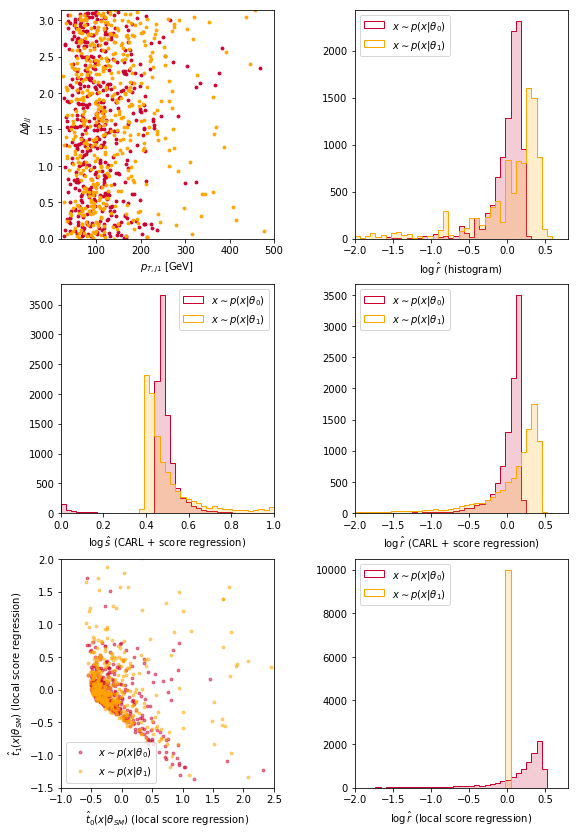

In [25]:
plt.figure(figsize=(8., calculate_height((2,3),8.)))

skip=20
logrmin, logrmax = -2., 0.8
bins=41



ax = plt.subplot(3,2,1)

plt.scatter(pt0[::skip], deltaphi0[::skip], c=colors[0], s=8.)
plt.scatter(pt1[::skip], deltaphi1[::skip], c=colors[1], s=8.)

plt.xlabel(r'$p_{T,j1}$ [GeV]')
plt.ylabel(r'$\Delta\phi_{jj}$')
plt.xlim(20.,500.)
plt.ylim(0.,np.pi)



ax = plt.subplot(3,2,2)

plt.hist(np.log(rhat0_histo), bins=bins, range=(logrmin, logrmax), color=colors[0], alpha=0.2)
plt.hist(np.log(rhat0_histo), bins=bins, range=(logrmin, logrmax), color=colors[0], lw=1., histtype='step',
        label=r'$x \sim p(x | \theta_0)$')

plt.hist(np.log(rhat1_histo), bins=bins, range=(logrmin, logrmax), color=colors[1], alpha=0.2)
plt.hist(np.log(rhat1_histo), bins=bins, range=(logrmin, logrmax), color=colors[1], lw=1., histtype='step',
        label=r'$x \sim p(x | \theta_1)$')

plt.legend()
plt.xlabel(r'$\log \, \hat{r}$ (histogram)')
plt.xlim(logrmin, logrmax)
plt.ylim(0.,None)



ax = plt.subplot(3,2,3)

plt.hist((shat0), bins=bins, range=(0.,1.), color=colors[0], alpha=0.2)
plt.hist((shat0), bins=bins, range=(0.,1.), color=colors[0], lw=1., histtype='step',
        label=r'$x \sim p(x | \theta_0)$')

plt.hist((shat1), bins=bins, range=(0.,1.), color=colors[1], alpha=0.2)
plt.hist((shat1), bins=bins, range=(0.,1.), color=colors[1], lw=1., histtype='step',
        label=r'$x \sim p(x | \theta_1)$')

plt.legend()
plt.xlabel(r'$\log \, \hat{s}$ (CARL + score regression)')
plt.xlim(0.,1.)
plt.ylim(0.,None)



ax = plt.subplot(3,2,4)

plt.hist(np.log(rhat0_carl), bins=bins, range=(logrmin, logrmax), color=colors[0], alpha=0.2)
plt.hist(np.log(rhat0_carl), bins=bins, range=(logrmin, logrmax), color=colors[0], lw=1., histtype='step',
        label=r'$x \sim p(x | \theta_0)$')

plt.hist(np.log(rhat1_carl), bins=bins, range=(logrmin, logrmax), color=colors[1], alpha=0.2)
plt.hist(np.log(rhat1_carl), bins=bins, range=(logrmin, logrmax), color=colors[1], lw=1., histtype='step',
        label=r'$x \sim p(x | \theta_1)$')

plt.legend()
plt.xlabel(r'$\log \, \hat{r}$ (CARL + score regression)')
plt.xlim(logrmin, logrmax)
plt.ylim(0.,None)



ax = plt.subplot(3,2,5)

plt.scatter(that0[::skip,0], that0[::skip,1], c=colors[0], s=8., alpha=0.5, 
        label=r'$x \sim p(x | \theta_0)$')
plt.scatter(that1[::skip,0], that1[::skip,1], c=colors[1], s=8., alpha=0.5, 
        label=r'$x \sim p(x | \theta_1)$')

plt.legend()
plt.xlabel(r'$\hat{t}_0 (x | \theta_{SM})$ (local score regression)')
plt.ylabel(r'$\hat{t}_1 (x | \theta_{SM})$ (local score regression)')
plt.xlim(-1.,2.5)
plt.ylim(-1.5,2.)



ax = plt.subplot(3,2,6)

plt.hist(np.log(rhat0_score), bins=bins, range=(logrmin, logrmax), color=colors[0], alpha=0.2)
plt.hist(np.log(rhat0_score), bins=bins, range=(logrmin, logrmax), color=colors[0], lw=1., histtype='step',
        label=r'$x \sim p(x | \theta_0)$')

plt.hist(np.log(rhat1_score), bins=bins, range=(logrmin, logrmax), color=colors[1], alpha=0.2)
plt.hist(np.log(rhat1_score), bins=bins, range=(logrmin, logrmax), color=colors[1], lw=1., histtype='step',
        label=r'$x \sim p(x | \theta_1)$')

plt.legend()
plt.xlabel(r'$\log \, \hat{r}$ (local score regression)')
plt.xlim(logrmin, logrmax)
plt.ylim(0.,None)



adjust_margins((2,3),8.)
plt.savefig("../figures/paper/inference_examples.pdf")

# Scatter score vs kinematics

ValueError: x and y must be the same size

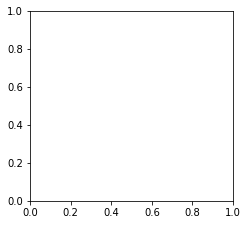

In [15]:
plt.figure(figsize=(8., calculate_height((2,2),8.)))

skip=20



ax = plt.subplot(2,2,1)

plt.scatter(pt0[::skip], that0[::skip], c=colors[0], s=8.)
plt.scatter(pt1[::skip], that1[::skip], c=colors[1], s=8.)

plt.xlabel(r'$p_{T,j1}$ [GeV]')
plt.ylabel(r'$\hat{t}_0(x | \theta_{SM})$')
plt.xlim(20.,500.)
plt.ylim(-0.5, 2.5)